# Main Quest 01 고객을 세그먼테이션하자!

## Segmentation Process
---

### 데이터 불러오기

#### 데이터 살펴보기

In [ ]:
SELECT *
FROM integral-hold-411001.modulabs_project.data

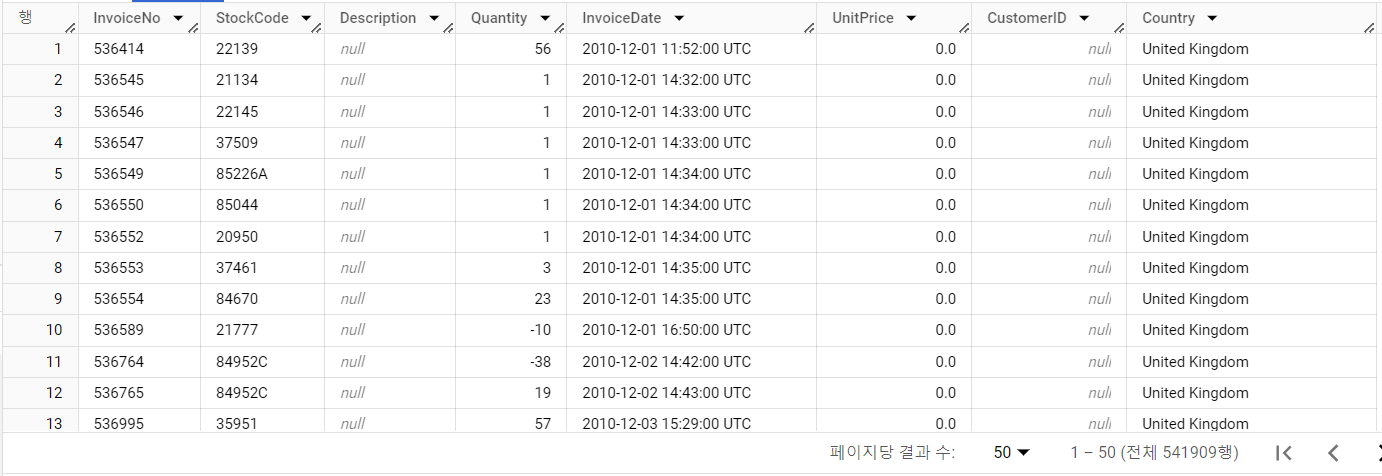

총 8개의 컬럼(InvoiceNo(string), StockCode(string), Description(string), Quantity(integer), InvoiceDate(timestamp), UnitPrice(float), CustomerID(integer), Country(string))과 541909행을 가진 데이터이다

In [ ]:
SELECT COUNT(InvoiceNo) as num_InvoiceNo, COUNT(StockCode) num_StockCode, COUNT(Description) num_Description, COUNT(Quantity) num_Quantity, COUNT(InvoiceDate) num_InvoiceDate, COUNT(UnitPrice) num_UnitPrice, COUNT(CustomerID) num_CustomerID, COUNT(Country) num_Country
FROM integral-hold-411001.modulabs_project.data

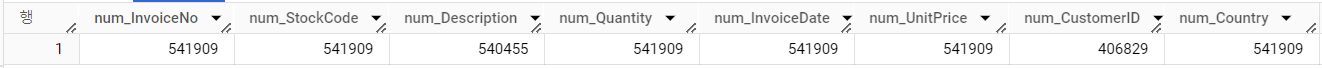

분석 - Description, CustomerID 컬럼에는 누락된 값이 있다

### 데이터 전처리(1) - 결측치 제거

#### 1. 컬럼 별 누락된 값의 비율 계산

In [ ]:
# 컬럼 별 누락된 값의 비율 계산
## 각 컬럼에 대해서 누락 값을 계산한 후, 계산된 누락 값을 UNION ALL을 통해 합쳐주세요.

SELECT
    'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'StockCode' AS column_name,
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'Description' AS column_name,
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'Quantity' AS column_name,
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'InvoiceDate' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'UnitPrice' AS column_name,
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'CustomerID' AS column_name,
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
UNION ALL
SELECT
    'Country' AS column_name,
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM integral-hold-411001.modulabs_project.data
ORDER BY missing_percentage

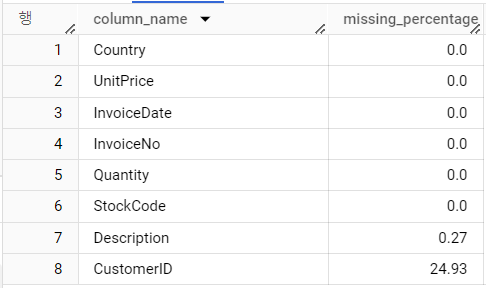

분석 - CustomerID는 누락된 데이터가 24.93%, Description은 누락된 데이터가 0.27%만큼 있음을 알 수 있습니다.

#### 2. 결측치 처리 전략

In [ ]:
## StockCode = '85123A'의 Description을 추출하는 쿼리문을 작성해 보세요.

SELECT DISTINCT(Description)
FROM integral-hold-411001.modulabs_project.data
WHERE StockCode = '85123A'

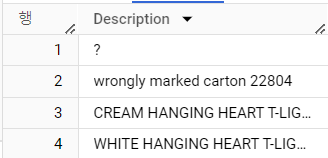

#### 3. 결측치 처리

In [ ]:
## 결측치를 제거할 때에는 DELETE 구문을 사용하며, WHERE 절을 통해 데이터를 제거할 조건을 제시해 줍니다.
## Customer ID 결측치 제거

DELETE FROM integral-hold-411001.modulabs_project.data
WHERE CustomerID IS NULL

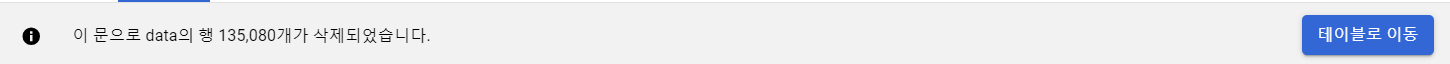

### 데이터 전처리(2) - 중복값 처리

#### 1. 중복값 확인

In [ ]:
## 중복된 행의 수를 세어주세요. 8개의 컬럼에 그룹 함수를 적용한 후, COUNT가 1보다 큰 데이터를 세어주면 됩니다.

SELECT *, COUNT(*)
FROM integral-hold-411001.modulabs_project.data
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1

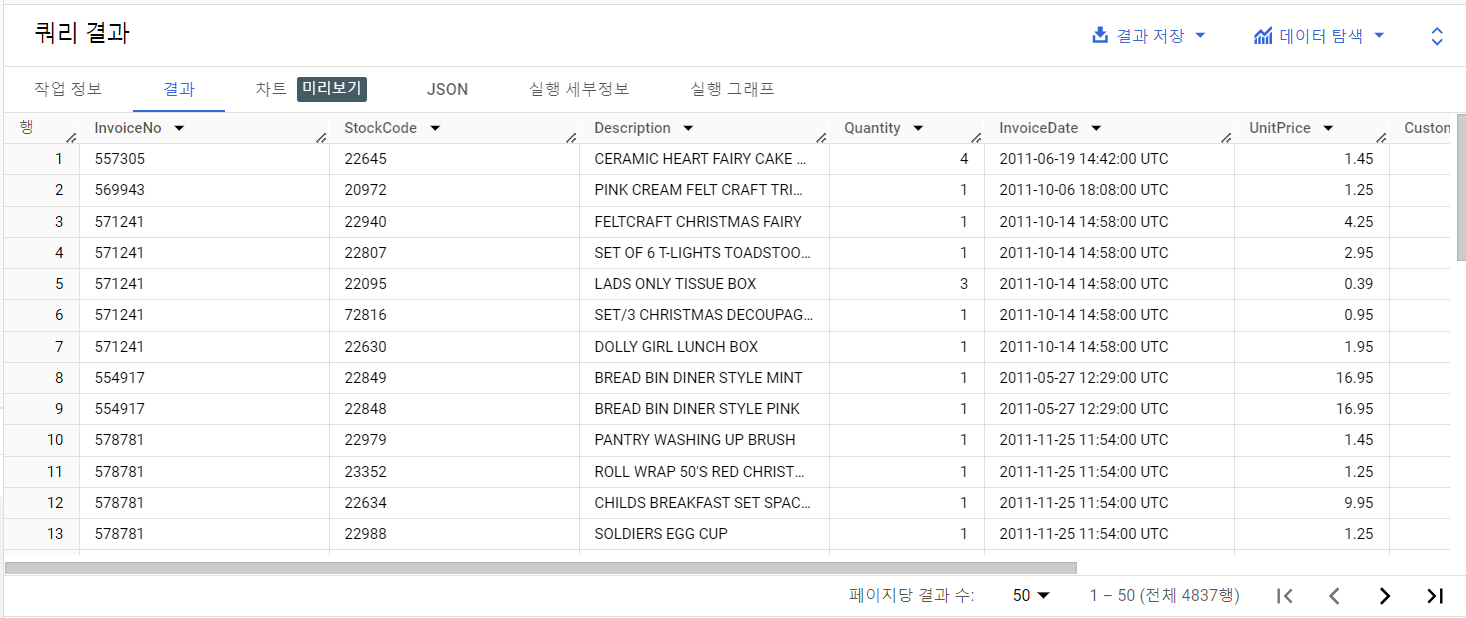

#### 2. 중복값 처리

In [ ]:
## CREATE OR REPLACE TABLE 구문을 활용하여 모든 컬럼(*)을 DISTINCT 한 데이터로 업데이트해 주세요.

CREATE OR REPLACE TABLE `integral-hold-411001.modulabs_project.data` 
AS
SELECT DISTINCT *
FROM integral-hold-411001.modulabs_project.data

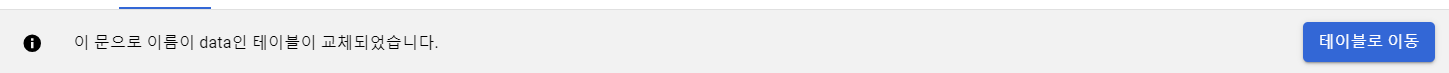

#### 3. 결과 확인하기

In [ ]:
## 중복값이 잘 처리되었는지 확인합니다.

SELECT COUNT(*)
FROM integral-hold-411001.modulabs_project.data

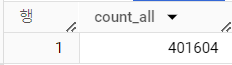

### 데이터 전처리(3) - 오류값 처리

#### 1. InvoiceNo 살펴보기

In [ ]:
## 고유(unique)한 InvoiceNo의 개수를 출력해 보세요.

SELECT COUNT(DISTINCT InvoiceNo)
FROM integral-hold-411001.modulabs_project.data

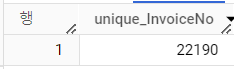

In [ ]:
## 이번에는 고유한 InvoiceNo를 앞에서부터 100개를 출력해 보세요. 아래와 같은 결과가 나와야 합니다.

SELECT DISTINCT InvoiceNo AS InvoiceNo
FROM integral-hold-411001.modulabs_project.data
LIMIT 100

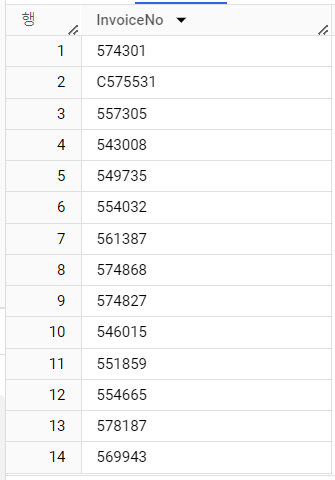

In [ ]:
## InvoiceNo가 'C'로 시작하는 행을 필터링할 수 있는 쿼리문을 작성해 주세요.

SELECT *
FROM integral-hold-411001.modulabs_project.data
WHERE InvoiceNo LIKE 'C%'
LIMIT 100

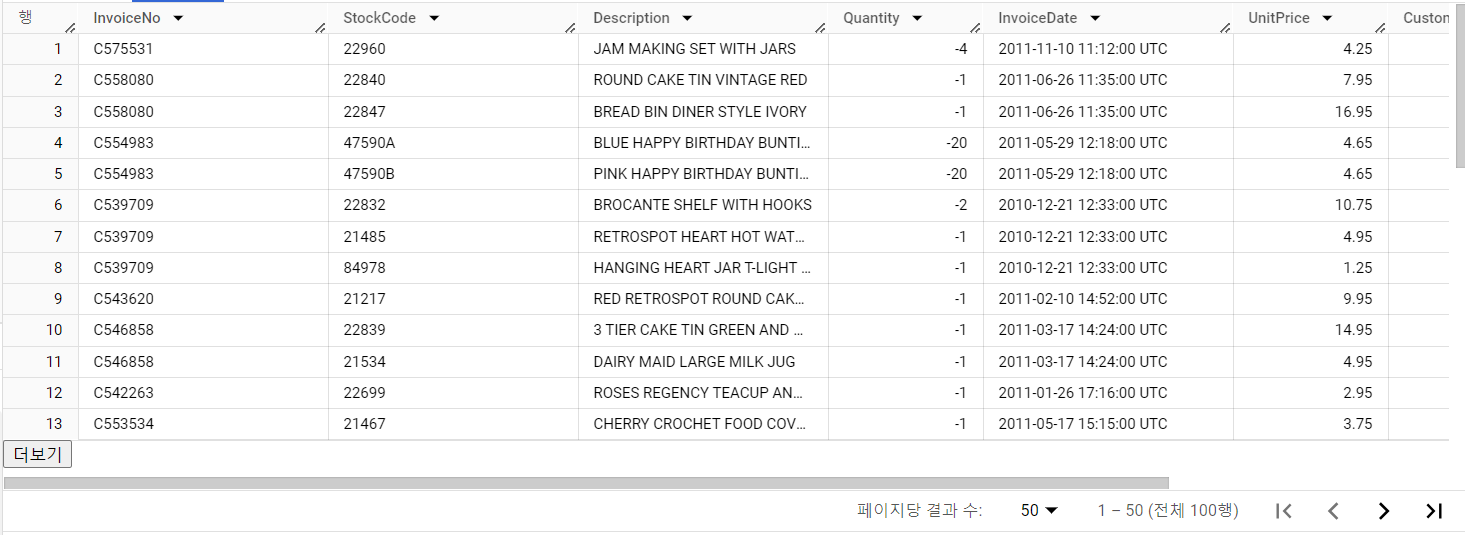

분석 - 취소된 거래 건들은 Quantity가 음수

In [ ]:
## 구매 건 상태가 Canceled 인 데이터의 비율(%)은 어떻게 되나요? 이를 계산할 수 있는 쿼리문을 작성하고, 취소 비율을 소수점 첫번째 자리까지 구해 주세요

SELECT CONCAT(ROUND(100 * SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END)/ COUNT(*), 1),'%') AS Canceled_percent
FROM integral-hold-411001.modulabs_project.data

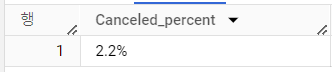

#### 2. StockCode 살펴보기

In [ ]:
## 이번엔 StockCode를 더 깊이 있게 살펴볼 차례입니다. 우선 고유한 StockCode의 개수를 출력해보겠습니다.

SELECT COUNT(DISTINCT StockCode)
FROM integral-hold-411001.modulabs_project.data

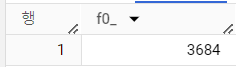

In [ ]:
## 이번에는 어떤 제품이 가장 많이 판매되었는지 보기 위하여 StockCode 별 등장 빈도를 출력해보겠습니다. 상위 10개의 제품들을 출력해 보세요.

SELECT StockCode, COUNT(*) AS sell_cnt 
FROM integral-hold-411001.modulabs_project.data
GROUP BY StockCode
ORDER BY sell_cnt DESC
LIMIT 10

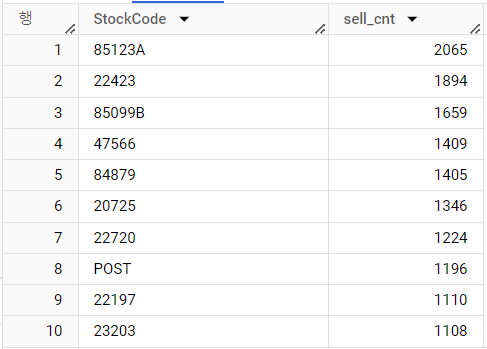

분석 - 대부분의 StockCode들은 5-6 자리 숫자입니다. StockCode 중 'POST'는 이상치 같아 보입니다.

In [ ]:
## '22423'와 '85123A'는 모두 다 숫자가 5개씩 포함되어 있는 문자열이지만 'POST'와 같은 비정상적인 항목들은 숫자가 0개 포함되어 있습니다.
### StockCode의 문자열 내 숫자의 길이를 구해 봅시다.

WITH UniqueStockCodes AS (
  SELECT DISTINCT StockCode
  FROM integral-hold-411001.modulabs_project.data
)
SELECT
  LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count,
  COUNT(*) AS stock_cnt
FROM UniqueStockCodes
GROUP BY number_count
ORDER BY stock_cnt DESC;

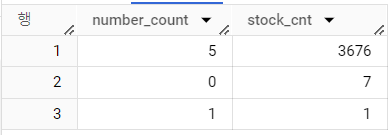

In [ ]:
### 숫자가 0~1개인 값들에는 어떤 코드들이 들어가 있는지를 확인해 봅시다.

SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM integral-hold-411001.modulabs_project.data
) 
WHERE LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) < 2

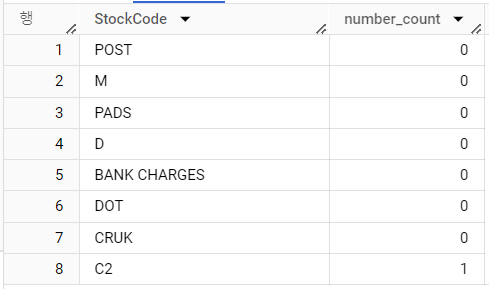

In [ ]:
### 해당 코드 값들을 가지고 있는 데이터 수는 전체 데이터 수 대비 몇 퍼센트일까요? 소수점 두번째 자리까지 구해 주세요.

SELECT 
  CONCAT(
    ROUND(100 * SUM(CASE WHEN LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) < 2 THEN 1 ELSE 0 END)/ COUNT(*), 2),'%') 
  AS odd_code_percent
FROM integral-hold-411001.modulabs_project.data

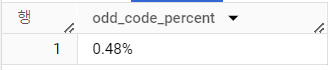

In [ ]:
## 제품과 관련되지 않은 거래 기록을 제거하는 쿼리문을 작성해 주세요. 

### 직접 작성한 코드
DELETE FROM integral-hold-411001.modulabs_project.data
WHERE LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) < 2

In [ ]:
### lms 예시 코드에 적용해 작성한 코드
DELETE FROM integral-hold-411001.modulabs_project.data
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (SELECT StockCode
  FROM integral-hold-411001.modulabs_project.data
  WHERE LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) < 2)
);

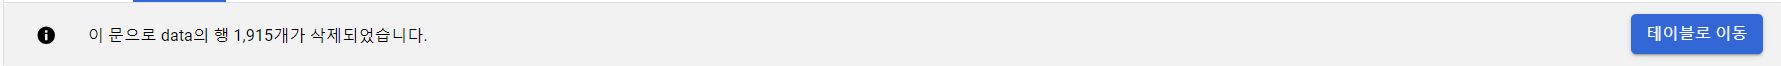

#### 3. Description 살펴보기

In [ ]:
## 먼저 데이터셋에서 고유한 Description 별 출현 빈도를 계산하고 상위 30개를 출력해 주세요.

SELECT Description, COUNT(*) AS description_cnt
FROM integral-hold-411001.modulabs_project.data
GROUP BY Description
ORDER BY 2 DESC
LIMIT 30

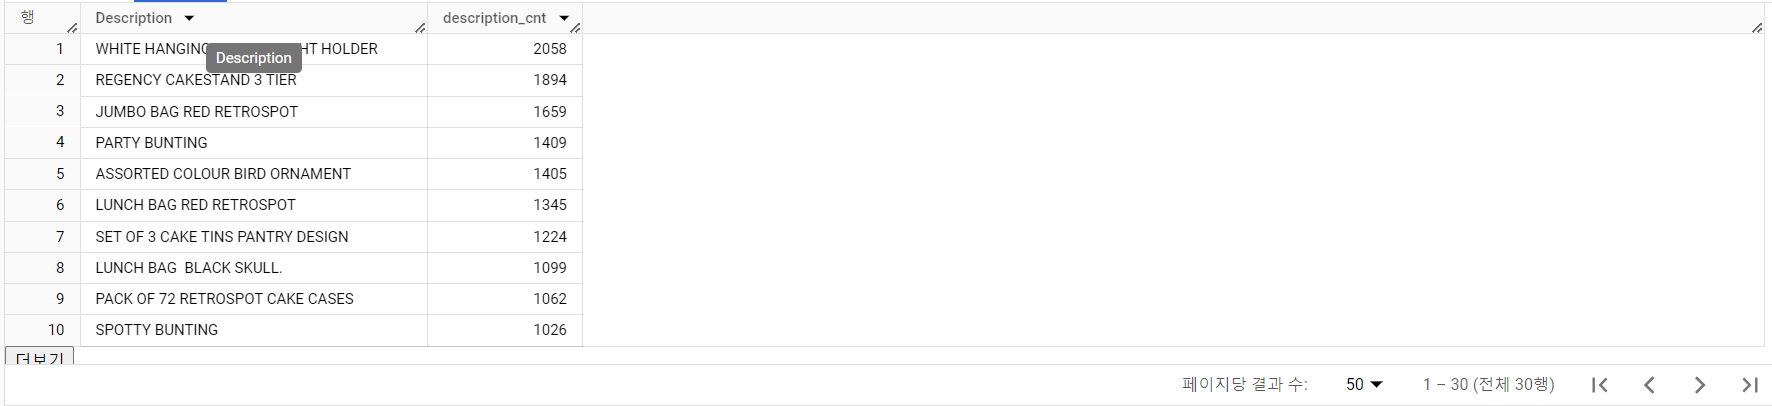

In [ ]:
## 대소문자가 혼합된 Description이 있는지 확인해 봅시다.

SELECT DISTINCT Description
FROM integral-hold-411001.modulabs_project.data
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

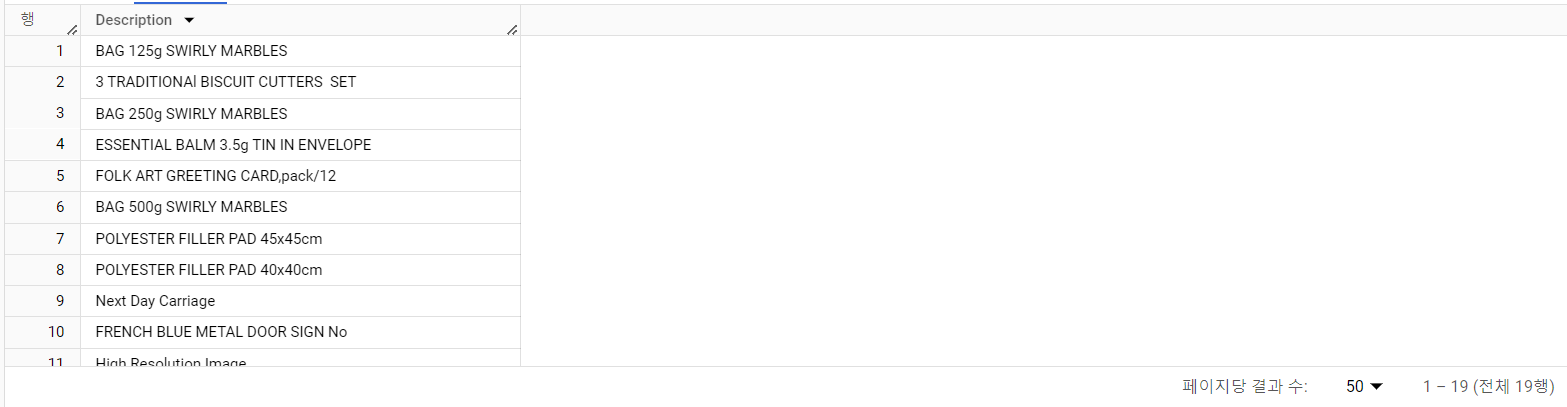

In [ ]:
## 우선 'Next Day Carriage'와 'High Resolution Image'와 같은 서비스 관련 정보를 포함하는 행들을 제거합니다.

DELETE
FROM integral-hold-411001.modulabs_project.data
WHERE 1=1
AND Description = 'Next Day Carriage'
OR Description = 'High Resolution Image'

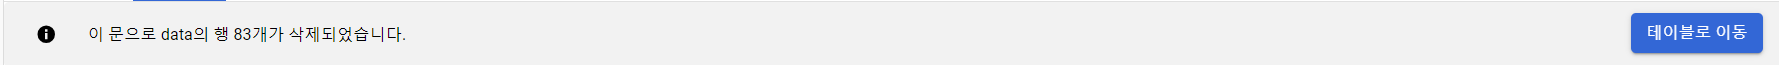

In [ ]:
## 이번에는 대소문자를 혼합하고 있는 데이터를 대문자로 표준화하는 쿼리문을 작성해 보세요.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.data AS
SELECT
  * EXCEPT (Description),
  UPPER(Description) AS Description
FROM integral-hold-411001.modulabs_project.data;

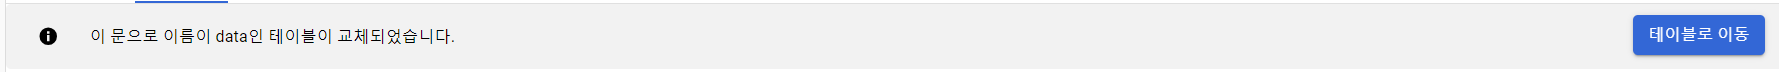

In [ ]:
## 결과 확인

SELECT DISTINCT Description
FROM integral-hold-411001.modulabs_project.data
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

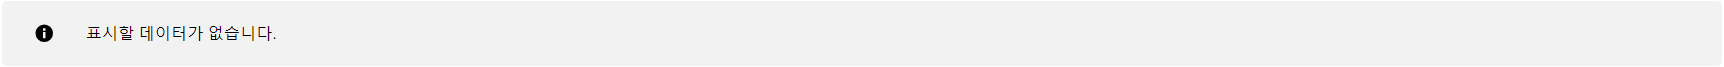
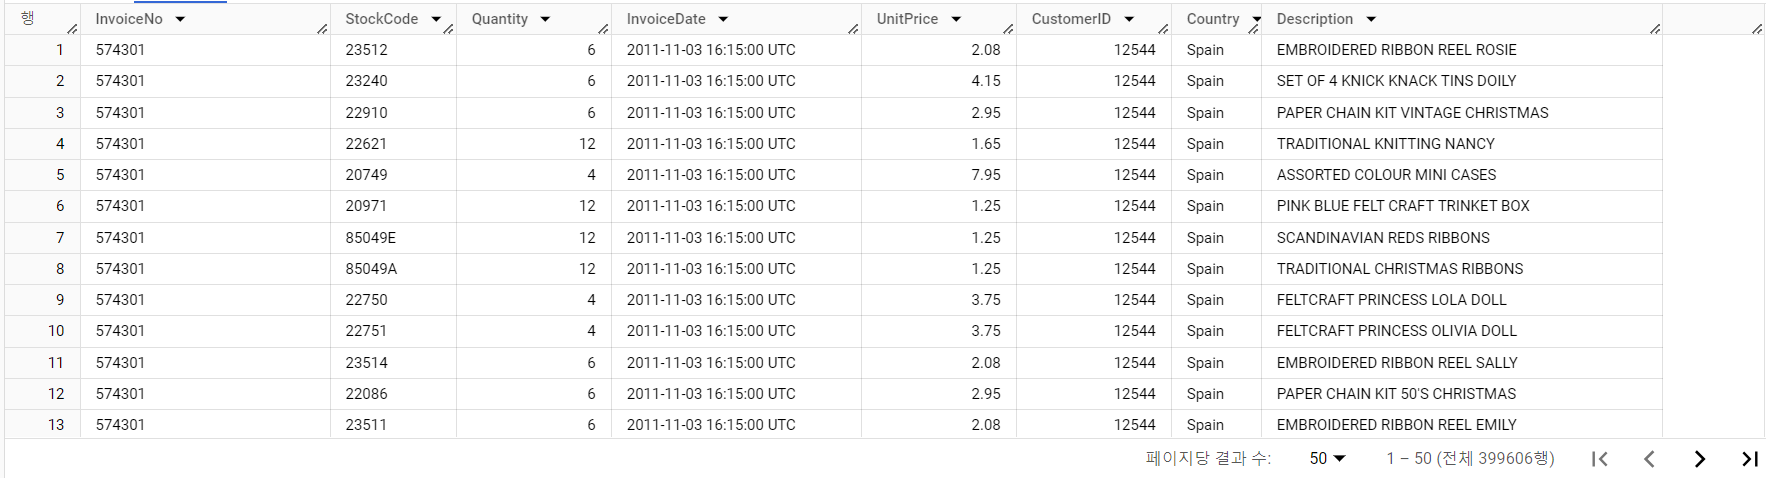

#### 4. UnitPrice 살펴보기
이번에는 UnitPrice에서 이상치를 찾아봅시다. 최솟값, 최댓값, 평균 데이터를 확인해 봄으로써, 단위 가격의 요약 통계량을 살펴보겠습니다.

! 단위 가격(UnitPrice)이란?
상품 1개당 가격을 말합니다. 즉 "단위 당 가격"을 의미합니다.

In [ ]:
## UnitPrice의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT MIN(UnitPrice) AS min_price, MAX(UnitPrice) AS max_price, AVG(UnitPrice) AS avg_price
FROM integral-hold-411001.modulabs_project.data;

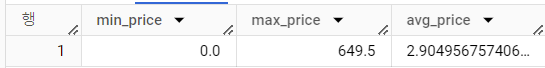

분석 - UnitPrice가 0인 데이터가 있습니다.

In [ ]:
## 단가가 0원인 거래의 개수, 구매 수량(Quantity)의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT COUNT(*) AS num_of_price_error, MIN(Quantity) AS min_quantity, MAX(Quantity) AS max_quantity, AVG(Quantity) AS avg_quantity,
FROM integral-hold-411001.modulabs_project.data
WHERE UnitPrice = 0

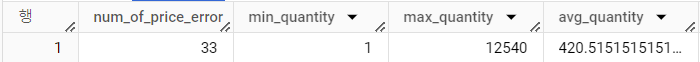

In [ ]:
## 데이터의 수가 적은 걸 보니 무료 제품이라기보다 데이터 오류일 가능성이 더 높을 것 같습니다. 
## 그래서 이 데이터(UnitPrice = 0)를 제거하고 일관된 데이터셋을 유지하도록 하겠습니다.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.data AS 
SELECT *
FROM integral-hold-411001.modulabs_project.data
WHERE UnitPrice != 0

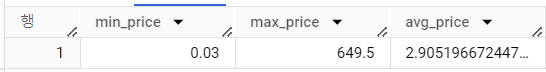

분석 - UnitPrice가 0인 데이터가 제거되었습니다

### RFM 스코어

#### 1. Recency

Recency 단계에서는 고객이 얼마나 최근에 구매를 했는지에 중점을 둡니다. 그러므로 '마지막 구매일로부터 현재까지 경과한 일수'를 계산해야 합니다. 낮은 값일수록 고객이 최근에 구매를 했음을 의미하며, 제품이나 서비스에 더 관심을 보인다고 예측할 수 있습니다. Recency를 통해 오랜 시간 동안 구매를 하지 않았던 고객을 발견하고, 다시 제품과 서비스로 불러들이기 위한 마케팅 전략을 맞춤화해볼 수도 있습니다.

In [ ]:
## 우선 InvoiceDate를 '2010-12-01 08:26:00'와 같은 'YYYY-MM-DD HH:MM:SS' 형태에서 'YYYY-MM-DD' 형태로 날짜에 해당하는 부분만 남겨놓고 싶습니다. 
## 이를 위해 DATE 함수를 활용하여 InvoiceDate 컬럼을 연월일 자료형으로 변경해 주세요.

SELECT DATE(InvoiceDate) AS InvoiceDay, *
FROM integral-hold-411001.modulabs_project.data

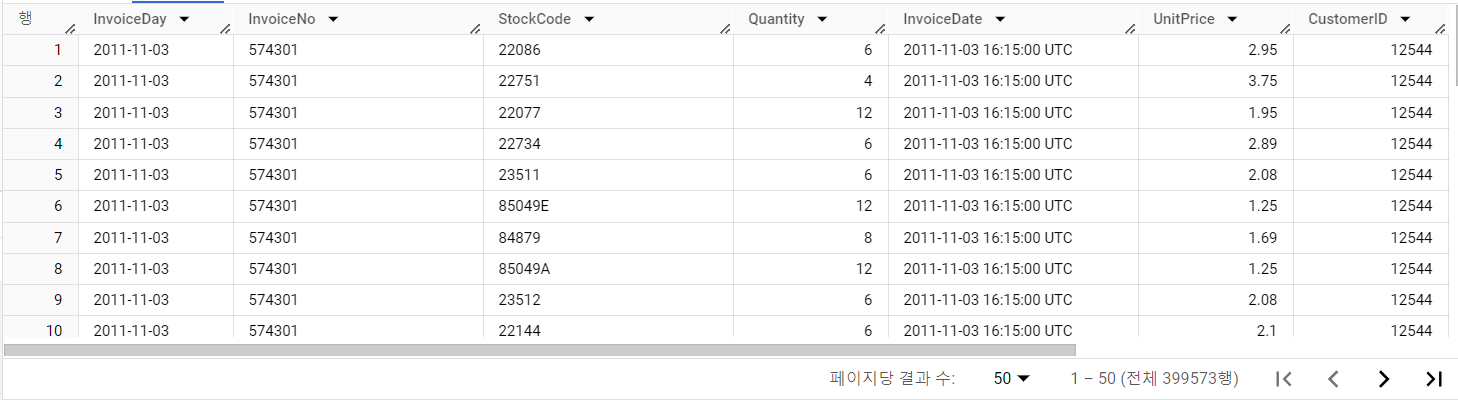

In [ ]:
## 우선 가장 최근 구매 일자를 MAX() 함수로 찾아보겠습니다.

SELECT DATE(MAX(InvoiceDate)) AS most_recent_date
FROM integral-hold-411001.modulabs_project.data

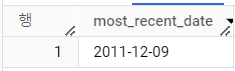

In [ ]:
## 이번에는 유저 별로 가장 최근에 일어난 구매 정보를 정리해 봅시다. 
## 유저 별로 가장 큰 InvoiceDay를 찾아서 가장 최근 구매일로 저장해 주겠습니다.

SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
FROM integral-hold-411001.modulabs_project.data
GROUP BY 1

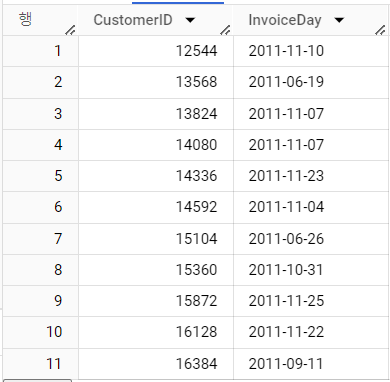

In [ ]:
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
);

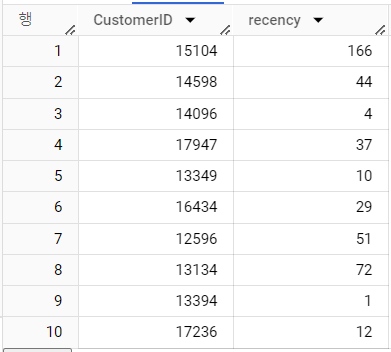

In [ ]:
CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.user_r AS(
  SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
)
)

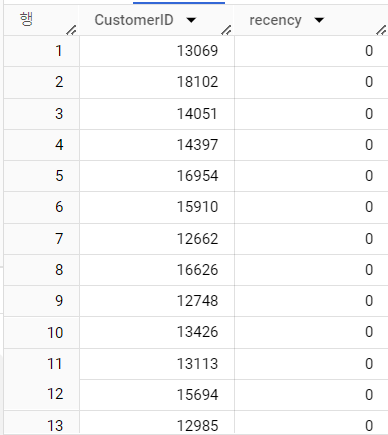

#### 2. Frequency

Frequency를 계산하는 단계에서는 고객의 구매 빈도 또는 참여 빈도에 초점을 맞춥니다. 전체 거래 건수로 계산을 할 수도 있고, 구매한 아이템의 수량을 합하여 계산할 수도 있습니다. 예를 들어 한 명의 고객이 구매를 2번 했는데 각각 아이템을 4개씩 구매한 경우, 해당 고객의 거래 건수는 2회겠지만 실제로 구매한 수량은 8개가 됩니다. 이 두가지 측면을 모두 포착하기 위해 두 개를 모두 계산해 봅시다.

In [ ]:
## 전체 거래 건수 계산
## 우선 각 고객의 거래 건수를 세어 봅시다. 
## 거래 건은 InvoiceNo를 기준으로 파악하면 되기 때문에, 고객마다 고유한 InvoiceNo의 수를 세어 주겠습니다.

SELECT
  CustomerID,
  COUNT(DISTINCT InvoiceNo) AS purchase_cnt
FROM integral-hold-411001.modulabs_project.data
GROUP BY CustomerID

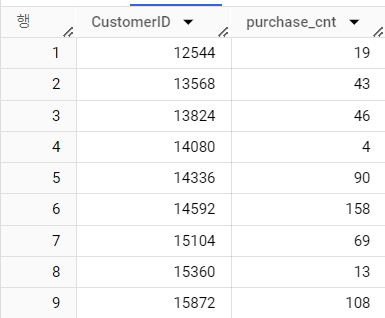

In [ ]:
## 구매한 아이템의 총 수량 계산
## 그 다음으로는 각 고객 별로 구매한 아이템의 총 수량을 더해주겠습니다.

SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM integral-hold-411001.modulabs_project.data
GROUP BY CustomerID

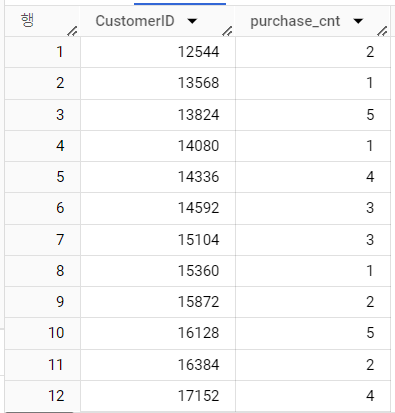

In [ ]:
## 이제 위에서 구한 '1. 전체 거래 건수 계산'과 '2. 구매한 아이템의 총 수량 계산'의 결과를 합쳐서 user_rf라는 이름의 테이블에 저장해 주겠습니다.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.user_rf AS

-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT CustomerID, COUNT(DISTINCT InvoiceNo) AS purchase_cnt
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
),

-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT CustomerID, SUM(Quantity) AS item_cnt
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
)

-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
  ur.recency
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN integral-hold-411001.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;

In [ ]:
## user_rf 데이터 조회

SELECT *
FROM integral-hold-411001.modulabs_project.user_rf

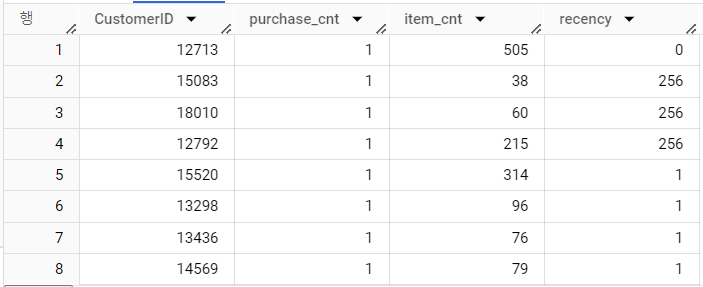

#### 3. Monetary

Monetary를 계산하는 단계에서는 고객이 지불한 총 금액에 초점을 맞춥니다. 이 때 총 지출액을 계산할수도 있고, 거래당 평균 거래 금액을 계산할 수도 있습니다. 예를 들어, 한 명의 고객이 총 2번의 구매를 했고, 그 합산 금액이 10만원인 경우, 총 지출액은 10만원, 거래당 평균 거래 금액은 5만원이 되는 것입니다.

결제한 총 금액이 높은 고객을 찾는 것도 좋지만, 한번에 많이 구매하는 고객들을 찾는 것도 굉장히 중요합니다. 결제 금액은 낮지만 구매를 자주 하는 고객과, 한번 결제할 때 큰 금액을 결제하는 고객은 분명 특성이나 행동 패턴이 다를테니까요.

이 두 가지 측면을 모두 포착하기 위해 고객별 총 지출액과 평균 거래 금액을 모두 계산해 봅시다.

In [ ]:
## 고객별 총 지출액 계산
## 고객별 총 지출액을 계산해 보세요. 소수점 첫째 자리에서 반올림하세요.

SELECT
  CustomerID,
  ROUND(SUM(Quantity * UnitPrice),0) AS user_total
FROM integral-hold-411001.modulabs_project.data
GROUP BY CustomerID

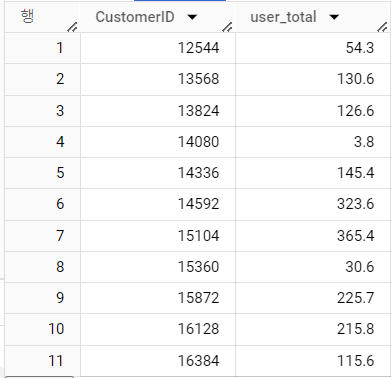

In [ ]:
## 고객별 평균 거래 금액 계산
## 고객별 평균 거래 금액을 구하기 위해 
## 1) data 테이블을 user_rf 테이블과 조인(LEFT JOIN) 한 후, 
## 2) purchase_cnt로 나누어서 
## 3) user_rfm 테이블로 저장해 봅시다.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.user_rfm AS   
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  rf.recency,
  ut.user_total,
  ROUND(ut.user_total/rf.purchase_cnt,0) AS user_average
FROM integral-hold-411001.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT CustomerID, ROUND(SUM(Quantity * UnitPrice),0) AS user_total
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
) ut
ON rf.CustomerID = ut.CustomerID;

#### 4. RFM 통합 테이블 출력하기

In [ ]:
## 최종 user_rfm 테이블을 출력

SELECT *
FROM integral-hold-411001.modulabs_project.user_rfm

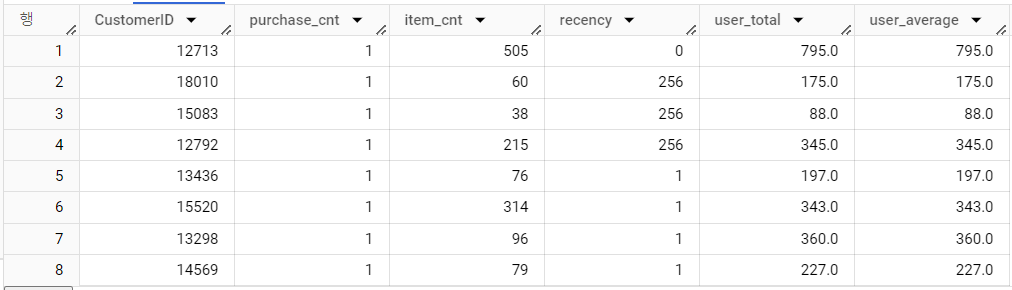
고유한 유저의 수는 4362명

### 추가 Feature 추출

그래서 이번에는 유저의 구매 패턴 속에서 뽑아낼 수 있는 추가적인 특징들이 있을지 살펴보려고 합니다. 크게 아래와 같이 3가지 측면에서 데이터를 분석할 것입니다.

1. 구매하는 제품의 다양성
2. 평균 구매 주기
3. 구매 취소 경향성

#### 클러스터링 알고리즘이란?
비슷한 특성을 가진 데이터 포인트들을 그룹화하는 기술   
이번 프로젝트에서는 K-Means 클러스터링을 활용해 보겠습니다.

#### 1. 구매하는 제품의 다양성

이 단계에서는 고객들의 제품 구매 행동 속 구매 제품의 다양성을 살펴보려고 합니다. 고객이 얼마나 다양한 제품들에 관심 있는 사람인지를 알게 되면, 개인 맞춤형 마케팅 전략과 추천 서비스를 계획하는 데에도 큰 도움이 될 수 있습니다.

In [ ]:
## 1) 고객 별로 구매한 상품들의 고유한 수를 계산합니다. 
## 높은 숫자가 나오는 것은 해당 고객이 다양한 제품들을 구매한다는 의미이며, 낮은 값이 나오는 경우 소수의 제품들만 구매한다는 것을 의미합니다.
## 2) user_rfm 테이블과 결과를 합치고,  
## 3) 이를 user_data라는 이름의 테이블에 저장하겠습니다.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.user_data AS  
WITH unique_products AS (
  SELECT
    CustomerID,
    COUNT(DISTINCT StockCode) AS unique_products
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
)
SELECT ur.*, up.* EXCEPT (CustomerID)
FROM integral-hold-411001.modulabs_project.user_rfm AS ur
JOIN unique_products AS up
ON ur.CustomerID = up.CustomerID;

In [ ]:
## user_data 데이터 조회

SELECT *
FROM integral-hold-411001.modulabs_project.user_data

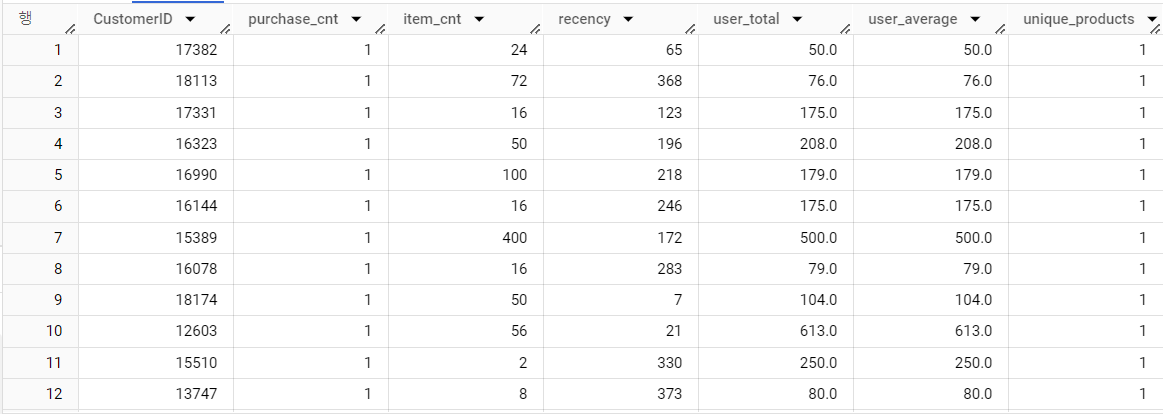

#### 2. 평균 구매 주기

이 단계에서는 고객들의 쇼핑 패턴을 이해하는 것을 목표로 합니다. 그 중에서도 고객 별 재방문 주기를 살펴볼 것입니다. 고객들의 구매와 구매 사이의 기간이 평균적으로 몇 일인지를 보여주는 평균 일수를 계산하면, 고객이 다음 구매를 언제할지 예측하는 데에도 큰 도움이 됩니다. 

In [ ]:
## 평균 구매 소요 일수를 계산하고, 그 결과를 user_data에 통합해 줍시다.

CREATE OR REPLACE TABLE project_name.modulabs_project.user_data AS 
WITH purchase_intervals AS (
  -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
  SELECT
    CustomerID,
    CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 ELSE ROUND(AVG(interval_), 2) END AS average_interval
  FROM (
    -- (1) 구매와 구매 사이에 소요된 일수
    SELECT
      CustomerID,
      DATE_DIFF(InvoiceDate, LAG(InvoiceDate) OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
    FROM
      project_name.modulabs_project.data
    WHERE CustomerID IS NOT NULL
  )
  GROUP BY CustomerID
)

SELECT u.*, pi.* EXCEPT (CustomerID)
FROM project_name.modulabs_project.user_data AS u
LEFT JOIN purchase_intervals AS pi
ON u.CustomerID = pi.CustomerID;

In [ ]:
SELECT *
FROM integral-hold-411001.modulabs_project.user_data

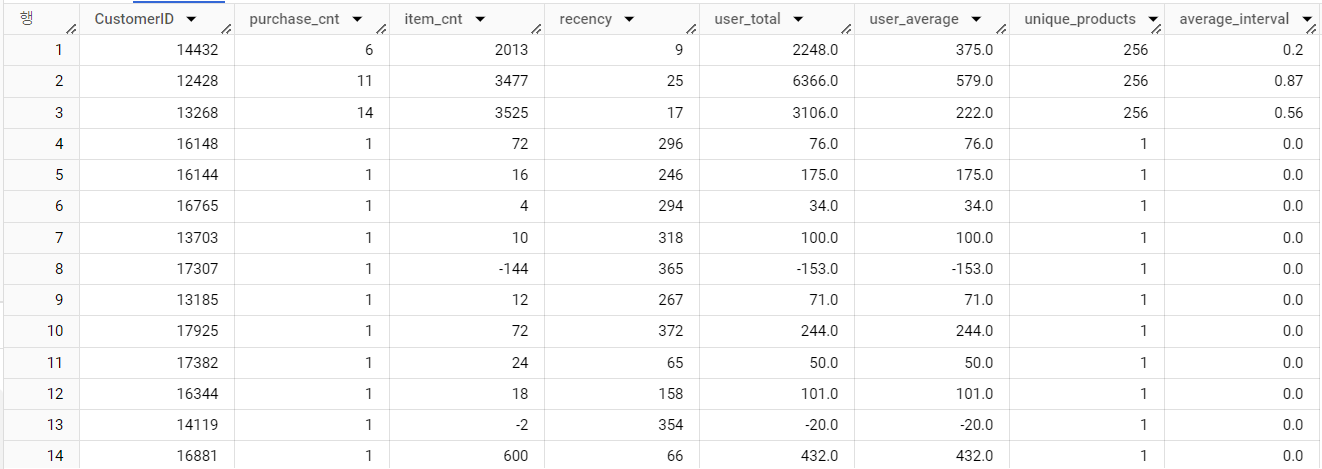

#### 3. 구매 취소 경향성

이 단계에서는 고객의 취소 패턴을 더 깊이 있게 파고 들어 고객을 세그먼테이션할 때 사용하려고 합니다. 아래와 같은 특징들을 추가해 보겠습니다.

1. 취소 빈도(cancel_frequency)

2. 취소 비율(cancel_rate)

In [ ]:
## 취소 빈도와 취소 비율을 계산하고 그 결과를 user_data에 통합해 줍시다. 취소 비율은 소수점 두번째 자리까지 구해 주세요.

CREATE OR REPLACE TABLE integral-hold-411001.modulabs_project.user_data AS

WITH TransactionInfo AS (
  SELECT
    CustomerID,
    COUNT(InvoiceNo) AS total_transactions,
    COUNT(case when InvoiceNo LIKE "C%" then 1 end) AS cancel_frequency
  FROM integral-hold-411001.modulabs_project.data
  GROUP BY CustomerID
)

SELECT u.*, t.* EXCEPT(CustomerID), ROUND((t.cancel_frequency/t.total_transactions), 2) AS cancel_rate
FROM `integral-hold-411001.modulabs_project.user_data` AS u
LEFT JOIN TransactionInfo AS t
ON u.CustomerID = t.CustomerID;

# user_data 데이터 조회
SELECT *
FROM integral-hold-411001.modulabs_project.user_data
ORDER BY cancel_frequency DESC

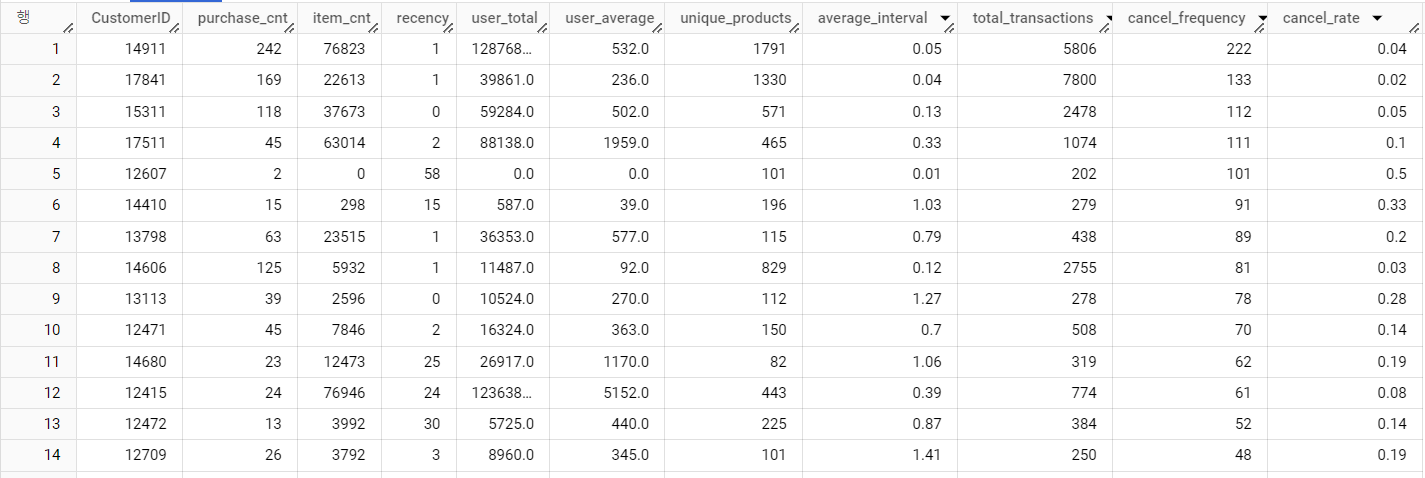

## Review
---

#### 데이터 분석 및 메인 퀘스트 첫 경험 소감

데이터를 직접 다운 받아 데이터 분석에 용이하도록 결측치 제거, 중복값 처리, 오류값 처리를 통해 전처리 과정을 거쳤다.

구매 최신성(Recency), 구매 빈도(Frequency), 구매 가치(Monetary)에 따라 고객들을 여러 그룹으로 나누는 세그먼테이션(segmentation) 방법인 RFM 스코어도 계산했다

그러나 RFM 스코어만으로는 유저별 구매 패턴을 구별할 수 없기 때문에 추가적으로 유저별 구매 패턴을 분석할 수 있도록 구매하는 제품의 다양성, 평균 구매 주기, 구매 취소 경향성까지 계산을 해 최종 user_data.csv를 완성시켰다. 

단계별로 설명이 잘 나와 있어서 잘 따라가면서 배웠던 내용을 상기만 시키면 대부분의 문제를 해결할 수 있었다. 고객의 상품 구매 관련 내역들이 익숙지 않은 내용들이라 초반에는 데이터 컬럼 항목 하나 하나가 어떤 의미를 가지고 있는지 이해하는데 시간을 좀 가진 것이 전체 과정에서 도움이 많이 되었던 것 같다.

앞으로 내가 데이터를 분석할 일이 있다면 가이드라인없이 데이터 전처리부터 데이터 분석까지 스스로 해야할텐데 걱정도 되지만 반복적인 학습을 통해 분명히 언젠가는 거뜬히 해낼 수 있을 거라 생각한다

#### 테이블 생성시 발생한 실수와 오류 수정

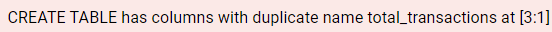

취소 빈도를 카운트할 때 식을 잘못 작성해 (반올림, case when then 구문 빠트림) 잘못된 값을 추가했다

그래서 위의 코드에서 취소 빈도 카운트하는 부분의 식만 수정해 실행을 했더니 이 순서에서 추가해야할 'total_transactions' 컬럼이 이미 있어 실행되지 않았다

그래서 컬럼을 삭제하는 명령어를 찾아 'total_transactions', 'cancel_frequency' 그리고 'cancel_rate' 컬럼 세 개를 삭제하고 수정된 코드를 실행시켰다

In [ ]:
## 컬럼 삭제 - 한줄씩 실행시켜야 한다

ALTER TABLE integral-hold-411001.modulabs_project.user_data DROP total_transactions
ALTER TABLE integral-hold-411001.modulabs_project.user_data DROP cancel_frequency
ALTER TABLE integral-hold-411001.modulabs_project.user_data DROP cancel_rate